# 1.
Первым делом нужно создать переменную, чтобы выделить аномально быстрые заезды.
Добавьте в таблицу data столбец too_fast (пер. «слишком быстрый») со значениями:
True — если продолжительность заезда из столбца time_spent менее 60 секунд.
False — все остальные значения.
Затем выведите на экран первые пять строк таблицы data, чтобы проверить новый столбец.

Подсказка
Если вызвать команду print(data['time_spent'] < 60), можно получить список значений True и False.
Но вам нужно не вывести результат, а записать его в новый столбец data.

In [3]:
import pandas as pd

data = pd.read_csv('../datasets/visits.csv', sep='\t')
data['too_fast'] = data['time_spent'] < 60
print(data.head())

         date_time        id  time_spent     name  too_fast
0  20180406T165358  76144fb2        98.0  Василёк     False
1  20180404T173913  76144fb2        15.0  Василёк      True
2  20180403T172824  76144fb2       220.0  Василёк     False
3  20180407T070441  76144fb2        19.0  Василёк      True
4  20180404T132049  76144fb2        14.0  Василёк      True


# 2.
Рассчитать процент всех заездов короче 60 секунд можно разными способами. Можно посчитать значения True в столбце too_fast методом value_counts() и разделить получившееся число на количество строк.
Другой способ — применить к столбцу too_fast метод mean(). Ведь среднее рассчитывают так: сумму значений делят на количество значений. Если применить арифметическую операцию к булевым значениям True и False, значение True будет интерпретировано как 1, а False — как 0. С помощью mean() можно сделать оба вычисления сразу: посчитать True и разделить его на количество строк.
Таким образом, найти процент быстрых заездов можно с помощью среднего арифметического.
Рассчитайте среднее арифметическое для значений в столбце too_fast.

Подсказка
Примените метод mean() к столбцу too_fast.

In [4]:
print(data['too_fast'].mean())

0.42213910893586964


# 3.
Переменная задана, процент посчитан, теперь можно группировать данные по АЗС. Для этого воспользуйтесь сводной таблицей.
Создайте переменную too_fast_stat и запишите в неё значения из сводной таблицы, сгруппировав процент быстрых заездов по АЗС.
Выведите на экран первые пять строк too_fast_stat.

Подсказка:
Примените метод pivot_table() к data, указав в аргументе индекс — id АЗС, а значения — столбец too_fast. Запишите результат в переменную too_fast_stat , а затем выведите на экран первые пять строк методом head().

In [5]:
too_fast_stat = data.pivot_table(index='id', values='too_fast')
print(too_fast_stat.head())

          too_fast
id                
00ca1b70  0.250000
011f7462  0.637489
015eaddd  0.726190
0178ce70  0.211538
018a83ef  0.510269


# 4.
Теперь вы знаете, сколько быстрых заездов на первых пяти АЗС в процентном отношении. Но что делать дальше — выводить на экран остальные 466 строк и изучать значения для каждой АЗС? Слишком сложно.
Гораздо лучше визуализировать распределение быстрых заездов сразу по всем АЗС. Гистограмма, вот что нужно!
Постройте гистограмму распределения значений в таблице too_fast_stat на 30 корзин.

Подсказка
Вызовите метод hist(). Задайте число корзин параметром bins.

array([[<AxesSubplot:title={'center':'too_fast'}>]], dtype=object)

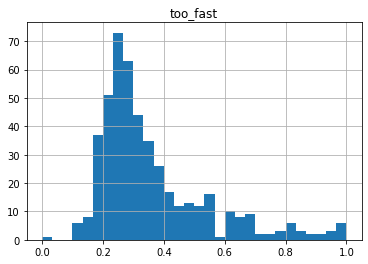

In [6]:
too_fast_stat.hist(bins=30)

# 5.
Теперь, когда вы разобрались, как использовать булевы значения для подсчёта процентов, примените этот метод для аномально долгих заправок — проверьте их распределение по АЗС. Как вы помните, заезды длиннее 1000 секунд решили исключить. Сейчас станет понятно, сколько АЗС это затронет.
Добавьте в data столбец too_slow (пер. «слишком медленный»), в котором значения из столбца time_spent больше 1000 секунд будут отмечены как True, а все остальные — как False.
Помня о бритве Оккама:
Создайте сводную таблицу с процентом медленных заездов для каждой АЗС.
Постройте гистограмму доли медленных заездов по всем АЗС на 30 корзин.

Подсказка
Задача аналогична предыдущим. Сперва создайте булев массив и сохраните его в столбце data['too_slow']. Затем с помощью последовательности data.pivot_table().hist() рассчитайте распределение долгих заездов и постройте соответствующую гистограмму.

array([[<AxesSubplot:title={'center':'too_slow'}>]], dtype=object)

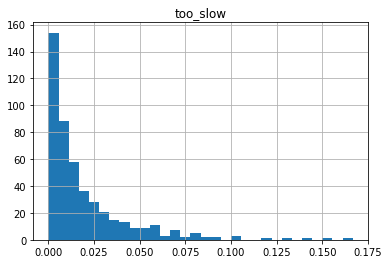

In [7]:
data['too_slow'] = data['time_spent'] > 1000.
(
    data.pivot_table(index='id', values='too_slow').
        hist(bins=30)
)